#  Partie Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from pylab import rcParams

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
home_team = pd.read_csv("X_Train_Data/train_home_team_statistics_df.csv")

away_team = pd.read_csv("X_Train_Data/train_away_team_statistics_df.csv")

 




In [2]:
home_team.head()


,ID,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,TEAM_YELLOWCARDS_season_sum,TEAM_REDCARDS_season_sum,TEAM_OFFSIDES_season_sum,TEAM_ATTACKS_season_sum,TEAM_PENALTIES_season_sum,TEAM_SUBSTITUTIONS_season_sum,TEAM_BALL_SAFE_season_sum,TEAM_DANGEROUS_ATTACKS_season_sum,TEAM_INJURIES_season_sum,TEAM_GOALS_season_sum,TEAM_GAME_WON_season_sum,TEAM_GAME_DRAW_season_sum,TEAM_GAME_LOST_season_sum,TEAM_SHOTS_TOTAL_season_average,TEAM_SHOTS_INSIDEBOX_season_average,TEAM_SHOTS_OFF_TARGET_season_average,TEAM_SHOTS_ON_TARGET_season_average,TEAM_SHOTS_OUTSIDEBOX_season_average,TEAM_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,TEAM_SAVES_season_average,TEAM_CORNERS_season_average,TEAM_BALL_POSSESSION_season_average,TEAM_FOULS_season_average,TEAM_YELLOWCARDS_season_average,TEAM_REDCARDS_season_average,TEAM_OFFSIDES_season_average,TEAM_ATTACKS_season_average,TEAM_PENALTIES_season_average,TEAM_SUBSTITUTIONS_season_average,TEAM_BALL_SAFE_season_average,TEAM_DANGEROUS_ATTACKS_season_average,TEAM_INJURIES_season_average,TEAM_GOALS_season_average,TEAM_GAME_WON_season_average,TEAM_GAME_DRAW_season_average,TEAM_GAME_LOST_season_average,TEAM_SHOTS_TOTAL_season_std,TEAM_SHOTS_INSIDEBOX_season_std,TEAM_SHOTS_OFF_TARGET_season_std,TEAM_SHOTS_ON_TARGET_season_std,TEAM_SHOTS_OUTSIDEBOX_season_std,TEAM_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std,TEAM_SAVES_season_std,TEAM_CORNERS_season_std,TEAM_BALL_POSSESSION_season_std,TEAM_FOULS_season_std,TEAM_YELLOWCARDS_season_std,TEAM_REDCARDS_season_std,TEAM_OFFSIDES_season_std,TEAM_ATTACKS_season_std,TEAM_PENALTIES_season_std,TEAM_SUBSTITUTIONS_season_std,TEAM_BALL_SAFE_season_std,TEAM_DANGEROUS_ATTACKS_season_std,TEAM_INJURIES_season_std,TEAM_GOALS_season_std,TEAM_SHOTS_TOTAL_5_last_match_sum,TEAM_SHOTS_INSIDEBOX_5_last_match_sum,TEAM_SHOTS_OFF_TARGET_5_last_match_sum,TEAM_SHOTS_ON_TARGET_5_last_match_sum,TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum,TEAM_PASSES_5_last_match_sum,TEAM_SUCCESSFUL_PASSES_5_last_match_sum,TEAM_SAVES_5_last_match_sum,TEAM_CORNERS_5_last_match_sum,TEAM_FOULS_5_last_match_sum,TEAM_YELLOWCARDS_5_last_match_sum,TEAM_REDCARDS_5_last_match_sum,TEAM_OFFSIDES_5_last_match_sum,TEAM_ATTACKS_5_last_match_sum,TEAM_PENALTIES_5_last_match_sum,TEAM_SUBSTITUTIONS_5_last_match_sum,TEAM_BALL_SAFE_5_last_match_sum,TEAM_DANGEROUS_ATTACKS_5_last_match_sum,TEAM_INJURIES_5_last_match_sum,TEAM_GOALS_5_last_match_sum,TEAM_GAME_WON_5_last_match_sum,TEAM_GAME_DRAW_5_last_match_sum,TEAM_GAME_LOST_5_last_match_sum,TEAM_SHOTS_TOTAL_5_last_match_average,TEAM_SHOTS_INSIDEBOX_5_last_match_average,TEAM_SHOTS_OFF_TARGET_5_last_match_average,TEAM_SHOTS_ON_TARGET_5_last_match_average,TEAM_SHOTS_OUTSIDEBOX_5_last_match_average,TEAM_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average,TEAM_SAVES_5_last_match_average,TEAM_CORNERS_5_last_match_average,TEAM_BALL_POSSESSION_5_last_match_average,TEAM_FOULS_5_last_match_average,TEAM_YELLOWCARDS_5_last_match_average,TEAM_REDCARDS_5_last_match_average,TEAM_OFFSIDES_5_last_match_average,TEAM_ATTACKS_5_last_match_average,TEAM_PENALTIES_5_last_match_average,TEAM_SUBSTITUTIONS_5_last_match_average,TEAM_BALL_SAFE_5_last_match_average,TEAM_DANGEROUS_ATTACKS_5_last_match_average,TEAM_INJURIES_5_last_match_average,TEAM_GOALS_5_last_match_average,TEAM_GAME_WON_5_last_match_average,TEAM_GAME_DRAW_5_last_match_average,TEAM_GAME_LOST_5_last_match_average,TEAM_SHOTS_TOTAL_5_last_match_std,TEAM_SHOTS_INSIDEBOX_5_last_match_std,TEAM_SHOTS_OFF_TARGET_5_last_match_std,TEAM_SHOTS_ON_TARGET_5_last_match_std,TEAM_SHOTS_OUTSIDEBOX_5_last_match_std,TEAM_PASSES_5_last_match

In [3]:
away_team.head()

,ID,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,TEAM_YELLOWCARDS_season_sum,TEAM_REDCARDS_season_sum,TEAM_OFFSIDES_season_sum,TEAM_ATTACKS_season_sum,TEAM_PENALTIES_season_sum,TEAM_SUBSTITUTIONS_season_sum,TEAM_BALL_SAFE_season_sum,TEAM_DANGEROUS_ATTACKS_season_sum,TEAM_INJURIES_season_sum,TEAM_GOALS_season_sum,TEAM_GAME_WON_season_sum,TEAM_GAME_DRAW_season_sum,TEAM_GAME_LOST_season_sum,TEAM_SHOTS_TOTAL_season_average,TEAM_SHOTS_INSIDEBOX_season_average,TEAM_SHOTS_OFF_TARGET_season_average,TEAM_SHOTS_ON_TARGET_season_average,TEAM_SHOTS_OUTSIDEBOX_season_average,TEAM_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,TEAM_SAVES_season_average,TEAM_CORNERS_season_average,TEAM_BALL_POSSESSION_season_average,TEAM_FOULS_season_average,TEAM_YELLOWCARDS_season_average,TEAM_REDCARDS_season_average,TEAM_OFFSIDES_season_average,TEAM_ATTACKS_season_average,TEAM_PENALTIES_season_average,TEAM_SUBSTITUTIONS_season_average,TEAM_BALL_SAFE_season_average,TEAM_DANGEROUS_ATTACKS_season_average,TEAM_INJURIES_season_average,TEAM_GOALS_season_average,TEAM_GAME_WON_season_average,TEAM_GAME_DRAW_season_average,TEAM_GAME_LOST_season_average,TEAM_SHOTS_TOTAL_season_std,TEAM_SHOTS_INSIDEBOX_season_std,TEAM_SHOTS_OFF_TARGET_season_std,TEAM_SHOTS_ON_TARGET_season_std,TEAM_SHOTS_OUTSIDEBOX_season_std,TEAM_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std,TEAM_SAVES_season_std,TEAM_CORNERS_season_std,TEAM_BALL_POSSESSION_season_std,TEAM_FOULS_season_std,TEAM_YELLOWCARDS_season_std,TEAM_REDCARDS_season_std,TEAM_OFFSIDES_season_std,TEAM_ATTACKS_season_std,TEAM_PENALTIES_season_std,TEAM_SUBSTITUTIONS_season_std,TEAM_BALL_SAFE_season_std,TEAM_DANGEROUS_ATTACKS_season_std,TEAM_INJURIES_season_std,TEAM_GOALS_season_std,TEAM_SHOTS_TOTAL_5_last_match_sum,TEAM_SHOTS_INSIDEBOX_5_last_match_sum,TEAM_SHOTS_OFF_TARGET_5_last_match_sum,TEAM_SHOTS_ON_TARGET_5_last_match_sum,TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum,TEAM_PASSES_5_last_match_sum,TEAM_SUCCESSFUL_PASSES_5_last_match_sum,TEAM_SAVES_5_last_match_sum,TEAM_CORNERS_5_last_match_sum,TEAM_FOULS_5_last_match_sum,TEAM_YELLOWCARDS_5_last_match_sum,TEAM_REDCARDS_5_last_match_sum,TEAM_OFFSIDES_5_last_match_sum,TEAM_ATTACKS_5_last_match_sum,TEAM_PENALTIES_5_last_match_sum,TEAM_SUBSTITUTIONS_5_last_match_sum,TEAM_BALL_SAFE_5_last_match_sum,TEAM_DANGEROUS_ATTACKS_5_last_match_sum,TEAM_INJURIES_5_last_match_sum,TEAM_GOALS_5_last_match_sum,TEAM_GAME_WON_5_last_match_sum,TEAM_GAME_DRAW_5_last_match_sum,TEAM_GAME_LOST_5_last_match_sum,TEAM_SHOTS_TOTAL_5_last_match_average,TEAM_SHOTS_INSIDEBOX_5_last_match_average,TEAM_SHOTS_OFF_TARGET_5_last_match_average,TEAM_SHOTS_ON_TARGET_5_last_match_average,TEAM_SHOTS_OUTSIDEBOX_5_last_match_average,TEAM_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average,TEAM_SAVES_5_last_match_average,TEAM_CORNERS_5_last_match_average,TEAM_BALL_POSSESSION_5_last_match_average,TEAM_FOULS_5_last_match_average,TEAM_YELLOWCARDS_5_last_match_average,TEAM_REDCARDS_5_last_match_average,TEAM_OFFSIDES_5_last_match_average,TEAM_ATTACKS_5_last_match_average,TEAM_PENALTIES_5_last_match_average,TEAM_SUBSTITUTIONS_5_last_match_average,TEAM_BALL_SAFE_5_last_match_average,TEAM_DANGEROUS_ATTACKS_5_last_match_average,TEAM_INJURIES_5_last_match_average,TEAM_GOALS_5_last_match_average,TEAM_GAME_WON_5_last_match_average,TEAM_GAME_DRAW_5_last_match_average,TEAM_GAME_LOST_5_last_match_average,TEAM_SHOTS_TOTAL_5_last_match_std,TEAM_SHOTS_INSIDEBOX_5_last_match_std,TEAM_SHOTS_OFF_TARGET_5_last_match_std,TEAM_SHOTS_ON_TARGET_5_last_match_std,TEAM_SHOTS_OUTSIDEBOX_5_last_match_std,TEAM_PASSES_5_last_match

In [4]:
# Colonne pour indiquer la provenance des données (HOME ou AWAY)
home_team['type'] = 'HOME'
away_team['type'] = 'AWAY'

# Je  combine les deux datasets
data_teams = pd.concat([home_team, away_team], ignore_index=True)

#résultat
data_teams.head()


,ID,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,TEAM_YELLOWCARDS_season_sum,TEAM_REDCARDS_season_sum,TEAM_OFFSIDES_season_sum,TEAM_ATTACKS_season_sum,TEAM_PENALTIES_season_sum,TEAM_SUBSTITUTIONS_season_sum,TEAM_BALL_SAFE_season_sum,TEAM_DANGEROUS_ATTACKS_season_sum,TEAM_INJURIES_season_sum,TEAM_GOALS_season_sum,TEAM_GAME_WON_season_sum,TEAM_GAME_DRAW_season_sum,TEAM_GAME_LOST_season_sum,TEAM_SHOTS_TOTAL_season_average,TEAM_SHOTS_INSIDEBOX_season_average,TEAM_SHOTS_OFF_TARGET_season_average,TEAM_SHOTS_ON_TARGET_season_average,TEAM_SHOTS_OUTSIDEBOX_season_average,TEAM_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_season_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_average,TEAM_SAVES_season_average,TEAM_CORNERS_season_average,TEAM_BALL_POSSESSION_season_average,TEAM_FOULS_season_average,TEAM_YELLOWCARDS_season_average,TEAM_REDCARDS_season_average,TEAM_OFFSIDES_season_average,TEAM_ATTACKS_season_average,TEAM_PENALTIES_season_average,TEAM_SUBSTITUTIONS_season_average,TEAM_BALL_SAFE_season_average,TEAM_DANGEROUS_ATTACKS_season_average,TEAM_INJURIES_season_average,TEAM_GOALS_season_average,TEAM_GAME_WON_season_average,TEAM_GAME_DRAW_season_average,TEAM_GAME_LOST_season_average,TEAM_SHOTS_TOTAL_season_std,TEAM_SHOTS_INSIDEBOX_season_std,TEAM_SHOTS_OFF_TARGET_season_std,TEAM_SHOTS_ON_TARGET_season_std,TEAM_SHOTS_OUTSIDEBOX_season_std,TEAM_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_season_std,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_season_std,TEAM_SAVES_season_std,TEAM_CORNERS_season_std,TEAM_BALL_POSSESSION_season_std,TEAM_FOULS_season_std,TEAM_YELLOWCARDS_season_std,TEAM_REDCARDS_season_std,TEAM_OFFSIDES_season_std,TEAM_ATTACKS_season_std,TEAM_PENALTIES_season_std,TEAM_SUBSTITUTIONS_season_std,TEAM_BALL_SAFE_season_std,TEAM_DANGEROUS_ATTACKS_season_std,TEAM_INJURIES_season_std,TEAM_GOALS_season_std,TEAM_SHOTS_TOTAL_5_last_match_sum,TEAM_SHOTS_INSIDEBOX_5_last_match_sum,TEAM_SHOTS_OFF_TARGET_5_last_match_sum,TEAM_SHOTS_ON_TARGET_5_last_match_sum,TEAM_SHOTS_OUTSIDEBOX_5_last_match_sum,TEAM_PASSES_5_last_match_sum,TEAM_SUCCESSFUL_PASSES_5_last_match_sum,TEAM_SAVES_5_last_match_sum,TEAM_CORNERS_5_last_match_sum,TEAM_FOULS_5_last_match_sum,TEAM_YELLOWCARDS_5_last_match_sum,TEAM_REDCARDS_5_last_match_sum,TEAM_OFFSIDES_5_last_match_sum,TEAM_ATTACKS_5_last_match_sum,TEAM_PENALTIES_5_last_match_sum,TEAM_SUBSTITUTIONS_5_last_match_sum,TEAM_BALL_SAFE_5_last_match_sum,TEAM_DANGEROUS_ATTACKS_5_last_match_sum,TEAM_INJURIES_5_last_match_sum,TEAM_GOALS_5_last_match_sum,TEAM_GAME_WON_5_last_match_sum,TEAM_GAME_DRAW_5_last_match_sum,TEAM_GAME_LOST_5_last_match_sum,TEAM_SHOTS_TOTAL_5_last_match_average,TEAM_SHOTS_INSIDEBOX_5_last_match_average,TEAM_SHOTS_OFF_TARGET_5_last_match_average,TEAM_SHOTS_ON_TARGET_5_last_match_average,TEAM_SHOTS_OUTSIDEBOX_5_last_match_average,TEAM_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_5_last_match_average,TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average,TEAM_SAVES_5_last_match_average,TEAM_CORNERS_5_last_match_average,TEAM_BALL_POSSESSION_5_last_match_average,TEAM_FOULS_5_last_match_average,TEAM_YELLOWCARDS_5_last_match_average,TEAM_REDCARDS_5_last_match_average,TEAM_OFFSIDES_5_last_match_average,TEAM_ATTACKS_5_last_match_average,TEAM_PENALTIES_5_last_match_average,TEAM_SUBSTITUTIONS_5_last_match_average,TEAM_BALL_SAFE_5_last_match_average,TEAM_DANGEROUS_ATTACKS_5_last_match_average,TEAM_INJURIES_5_last_match_average,TEAM_GOALS_5_last_match_average,TEAM_GAME_WON_5_last_match_average,TEAM_GAME_DRAW_5_last_match_average,TEAM_GAME_LOST_5_last_match_average,TEAM_SHOTS_TOTAL_5_last_match_std,TEAM_SHOTS_INSIDEBOX_5_last_match_std,TEAM_SHOTS_OFF_TARGET_5_last_match_std,TEAM_SHOTS_ON_TARGET_5_last_match_std,TEAM_SHOTS_OUTSIDEBOX_5_last_match_std,TEAM_PASSES_5_last_match

# Colonnes importantes pour le clustering


In [5]:

colonnes_clustering = [
    'TEAM_GOALS_season_sum', 
    'TEAM_SHOTS_TOTAL_season_sum', 
    'TEAM_BALL_POSSESSION_season_average'
]



# Filtrer les colonnes nécessaires


In [6]:
data_clustering = data_teams[colonnes_clustering]

# K-Means

In [7]:
# les valeurs NaN dans tout le DataFrame
print(data_clustering.isnull().sum())


TEAM_GOALS_season_sum                    8
TEAM_SHOTS_TOTAL_season_sum            519
TEAM_BALL_POSSESSION_season_average      3
dtype: int64


In [8]:
# je remplacer les NaN par la moyenne de chaque colonne
data_clustering_clean = data_clustering.fillna(data_clustering.mean())

# si les NaN ont été éliminés
print(data_clustering_clean.isnull().sum())


TEAM_GOALS_season_sum                  0
TEAM_SHOTS_TOTAL_season_sum            0
TEAM_BALL_POSSESSION_season_average    0
dtype: int64


In [9]:
means = KMeans(n_clusters=3, random_state=0)
means.fit(data_clustering_clean)
data_teams.loc[data_clustering_clean.index, 'cluster_kmeans'] = means.labels_

# Vérifier les résultats
data_teams[['type', 'cluster_kmeans']].head()

,type,cluster_kmeans
0,HOME,2.0
1,HOME,1.0
2,HOME,2.0
3,HOME,1.0
4,HOME,0.0


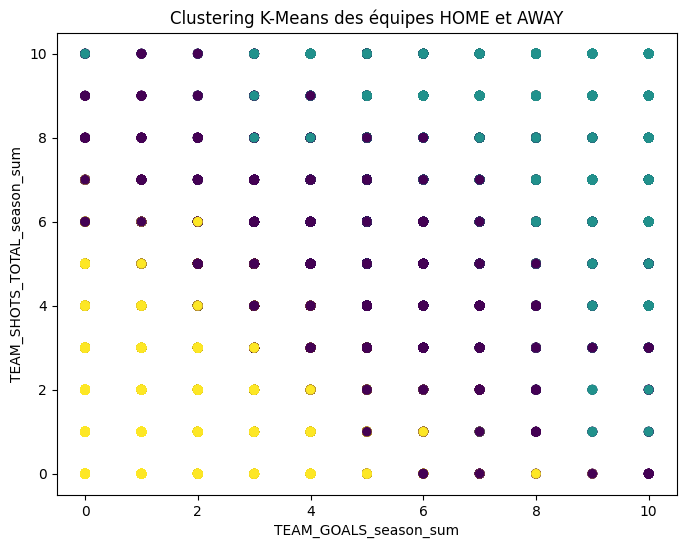

In [10]:
#les clusters avec les deux premières colonnes
plt.figure(figsize=(8, 6))
plt.scatter(data_clustering.iloc[:, 0], data_clustering.iloc[:, 1], c=means.labels_)
plt.title("Clustering K-Means des équipes HOME et AWAY")
plt.xlabel(colonnes_clustering[0])
plt.ylabel(colonnes_clustering[1])
plt.show()

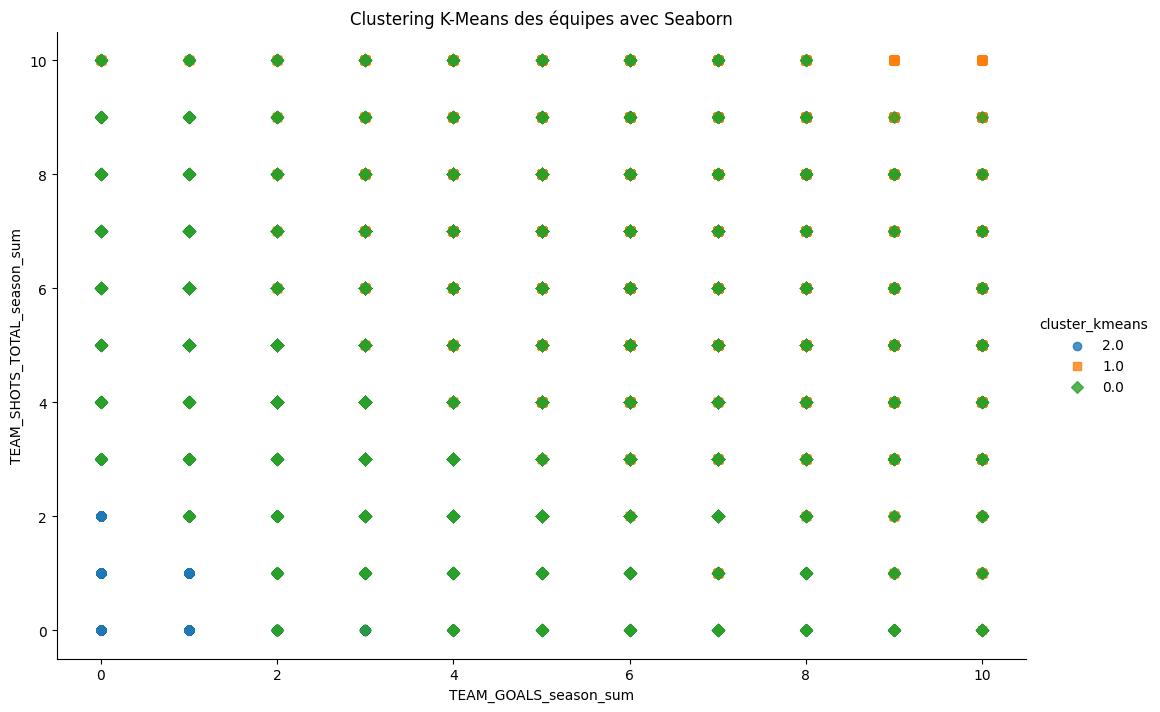

In [11]:
data_teams['cluster_kmeans'] = data_teams['cluster_kmeans'].astype(str)

sns.lmplot(
    data=data_teams, 
    x='TEAM_GOALS_season_sum', 
    y='TEAM_SHOTS_TOTAL_season_sum', 
    hue='cluster_kmeans', 
    fit_reg=False, 
    markers=['o', 's', 'D'], 
    height=7, 
    aspect=1.5
)
plt.title("Clustering K-Means des équipes avec Seaborn")
plt.show()

# CHA

In [12]:
# je  cree  un modèle de classification hiérarchique ascendante
CHA = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Adapter le modèle aux données
labels_cha = CHA.fit_predict(data_clustering_clean)
data_teams['cluster_cha'] = labels_cha
data_teams[['type', 'cluster_cha']].head()


,type,cluster_cha
0,HOME,1
1,HOME,0
2,HOME,1
3,HOME,0
4,HOME,1


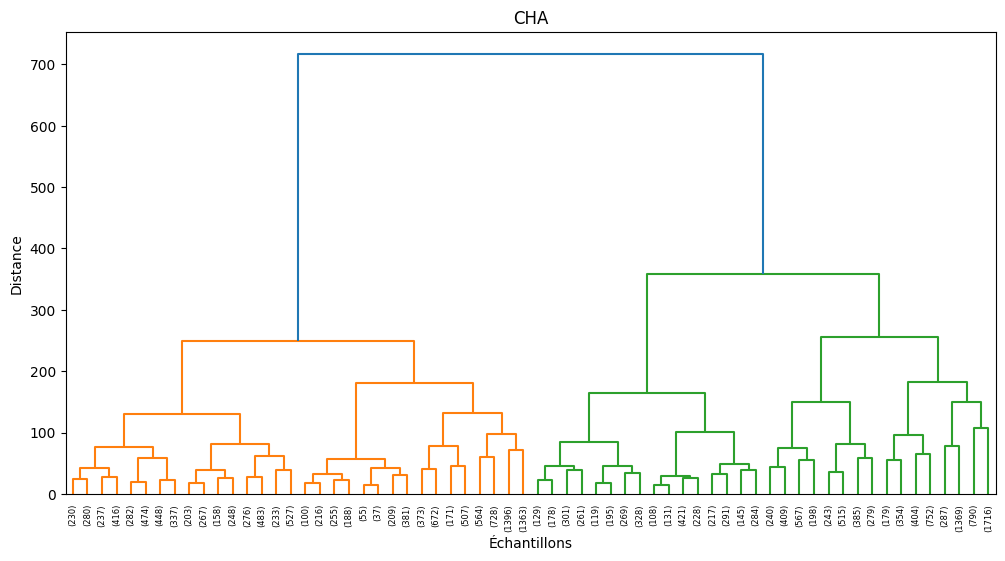

In [13]:
rcParams['figure.figsize'] = 12, 6
#generate the linkage matrix – Ward method
linkage_matrix = linkage(data_clustering_clean, method='ward')
#plotting the dendrogram
plt.title("CHA")
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.xlabel("Échantillons")
plt.ylabel("Distance")
plt.show()

# comparaison des clusters

In [14]:
data_teams[['type', 'cluster_kmeans', 'cluster_cha']].head()

,type,cluster_kmeans,cluster_cha
0,HOME,2.0,1
1,HOME,1.0,0
2,HOME,2.0,1
3,HOME,1.0,0
4,HOME,0.0,1


# Les clusters CHA avec deux colonnes

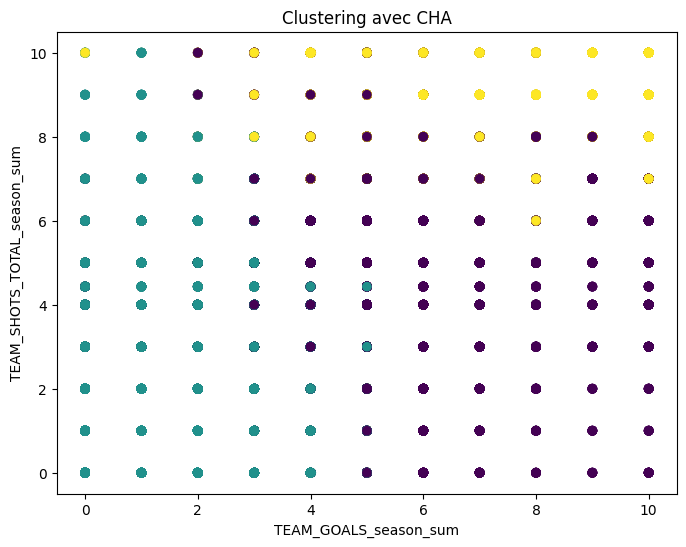

In [15]:

plt.figure(figsize=(8, 6))
plt.scatter(data_clustering_clean.iloc[:, 0], data_clustering_clean.iloc[:, 1], c=labels_cha)
plt.title("Clustering avec CHA")
plt.xlabel('TEAM_GOALS_season_sum')
plt.ylabel('TEAM_SHOTS_TOTAL_season_sum')
plt.show()